In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

data_dir = "data"
cities = ["Houston_texas_US", "London_UK", "Pune_India", "Chennai_India"]

dfs = []
for city in cities:
    file_path = os.path.join(data_dir, f"data_{city.replace(',','_').replace(' ','_')}.csv")
    df = pd.read_csv(file_path, parse_dates=["date"])
    df["city"] = city
    dfs.append(df)

weather_df = pd.concat(dfs, ignore_index=True)
weather_df.head()


,city,date,avgTempC,maxtempC,mintempC,sunHour,uvIndex,totalSnow_cm,precipMM,humidity,pressure,windspeedKmph,weatherDesc
0,Houston_texas_US,2023-10-26,25,28,24,2.0,6,0.0,12.1,85,1016,15,Moderate or heavy rain shower
1,Houston_texas_US,2023-10-27,26,29,24,3.0,6,0.0,1.9,77,1017,12,Patchy rain possible
2,Houston_texas_US,2023-10-28,26,30,24,7.0,6,0.0,1.0,77,1017,14,Patchy rain possible
3,Houston_texas_US,2023-10-29,25,30,18,3.0,5,0.0,8.0,73,1015,13,Moderate or heavy rain shower
4,Houston_texas_US,2023-10-30,11,16,8,1.0,3,0.0,5.0,80,1021,23,Moderate or heavy rain shower


In [2]:
weather_df.drop_duplicates(inplace=True)

numeric_cols = ["avgTempC","maxtempC","mintempC","sunHour","uvIndex",
                "totalSnow_cm","precipMM","humidity","pressure","windspeedKmph"]

for col in numeric_cols:
    weather_df[col] = pd.to_numeric(weather_df[col], errors="coerce")

weather_df.fillna(0, inplace=True)

weather_df["temp_range"] = weather_df["maxtempC"] - weather_df["mintempC"]


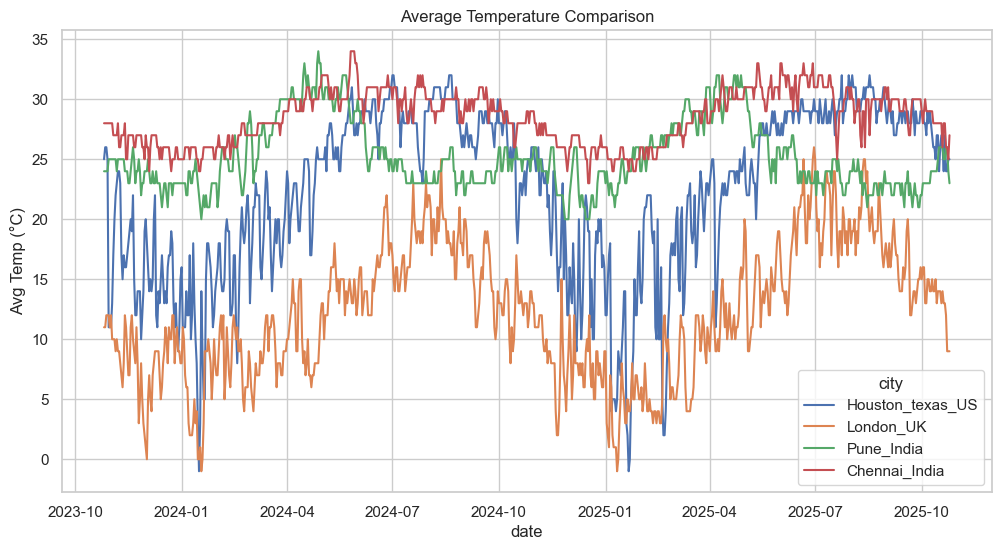

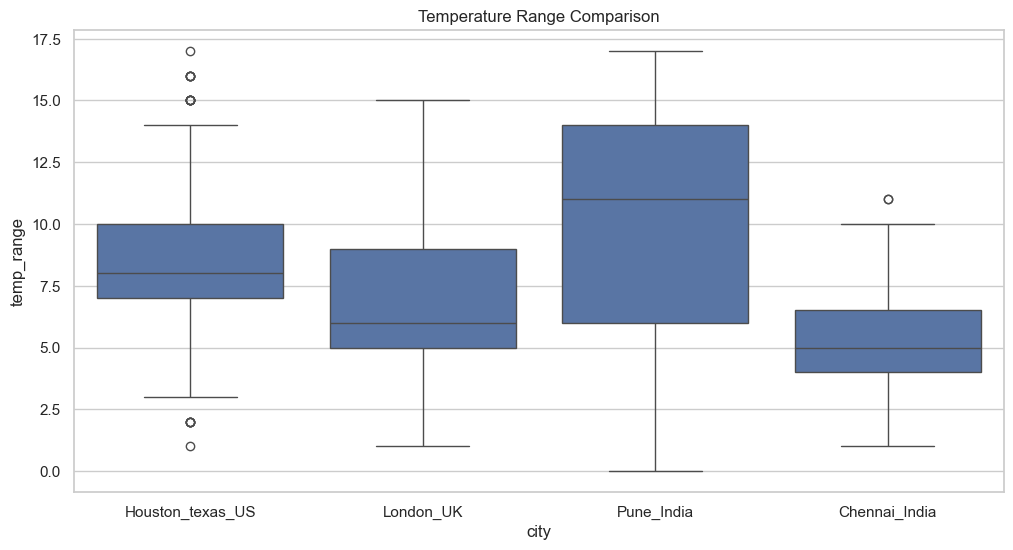

In [3]:
plt.figure()
sns.lineplot(data=weather_df, x="date", y="avgTempC", hue="city")
plt.title("Average Temperature Comparison")
plt.ylabel("Avg Temp (°C)")
plt.show()

plt.figure()
sns.boxplot(data=weather_df, x="city", y="temp_range")
plt.title("Temperature Range Comparison")
plt.show()


C:\Users\shali\AppData\Local\Temp\ipykernel_18756\745537562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_df.groupby("city")["precipMM"].sum().reset_index(), x="city", y="precipMM", palette="Blues")


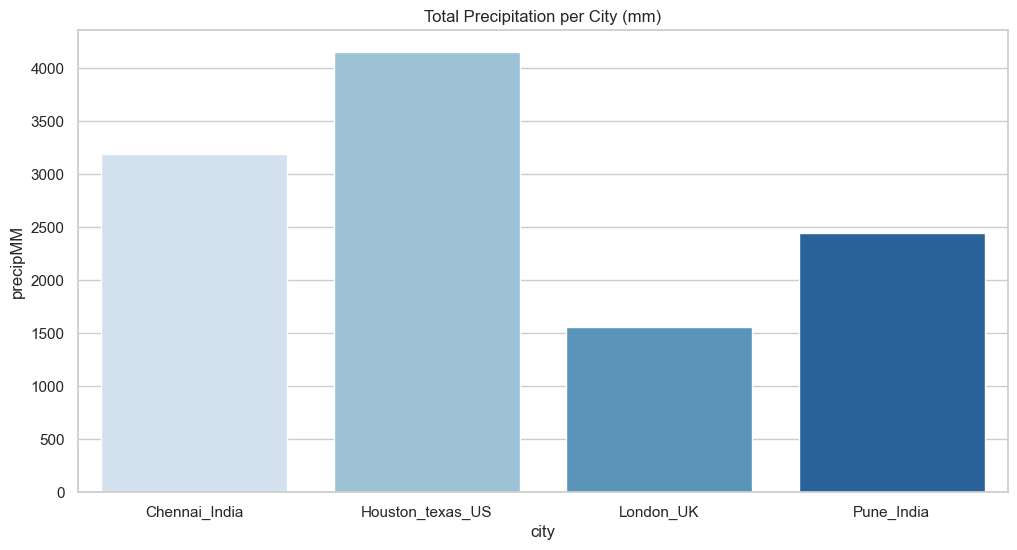

In [4]:

plt.figure()
sns.barplot(data=weather_df.groupby("city")["precipMM"].sum().reset_index(), x="city", y="precipMM", palette="Blues")
plt.title("Total Precipitation per City (mm)")
plt.show()



C:\Users\shali\AppData\Local\Temp\ipykernel_18756\434406621.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rainy_days, x="city", y="rainy_day", palette="Blues_r")


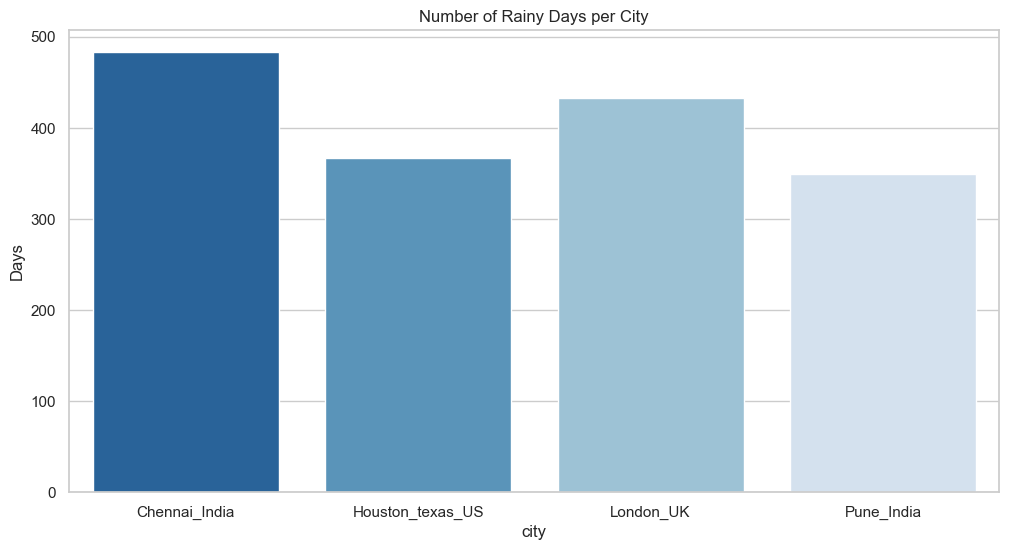

In [5]:
weather_df["rainy_day"] = weather_df["precipMM"] > 0
rainy_days = weather_df.groupby("city")["rainy_day"].sum().reset_index()
sns.barplot(data=rainy_days, x="city", y="rainy_day", palette="Blues_r")
plt.title("Number of Rainy Days per City")
plt.ylabel("Days")
plt.show()


C:\Users\shali\AppData\Local\Temp\ipykernel_18756\2281512911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_df.groupby("city")["sunHour"].mean().reset_index(), x="city", y="sunHour", palette="Oranges")


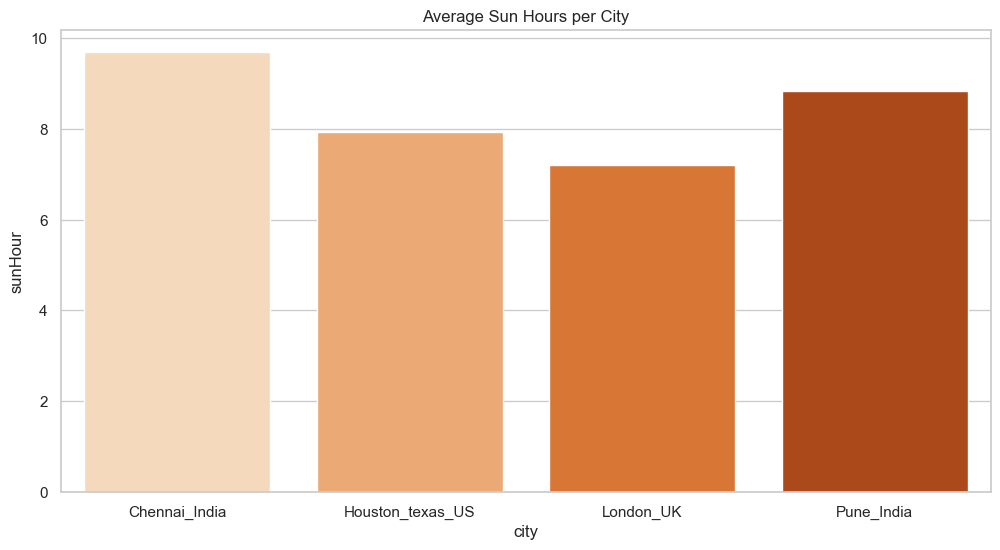

C:\Users\shali\AppData\Local\Temp\ipykernel_18756\2281512911.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_df.groupby("city")["uvIndex"].mean().reset_index(), x="city", y="uvIndex", palette="YlOrBr")


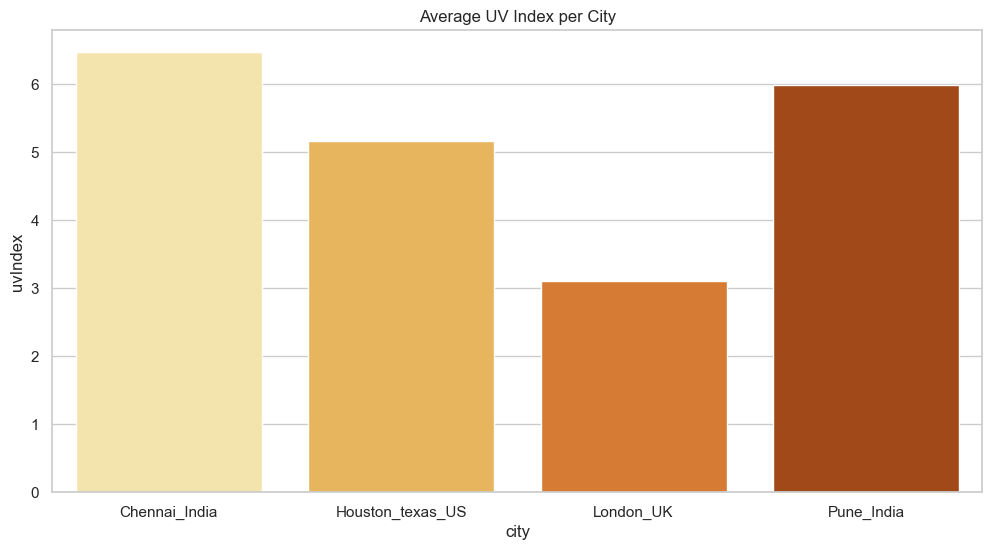

In [6]:

plt.figure()
sns.barplot(data=weather_df.groupby("city")["sunHour"].mean().reset_index(), x="city", y="sunHour", palette="Oranges")
plt.title("Average Sun Hours per City")
plt.show()

plt.figure()
sns.barplot(data=weather_df.groupby("city")["uvIndex"].mean().reset_index(), x="city", y="uvIndex", palette="YlOrBr")
plt.title("Average UV Index per City")
plt.show()


C:\Users\shali\AppData\Local\Temp\ipykernel_18756\1543670649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_df.groupby("city")["windspeedKmph"].mean().reset_index(), x="city", y="windspeedKmph", palette="Greens")


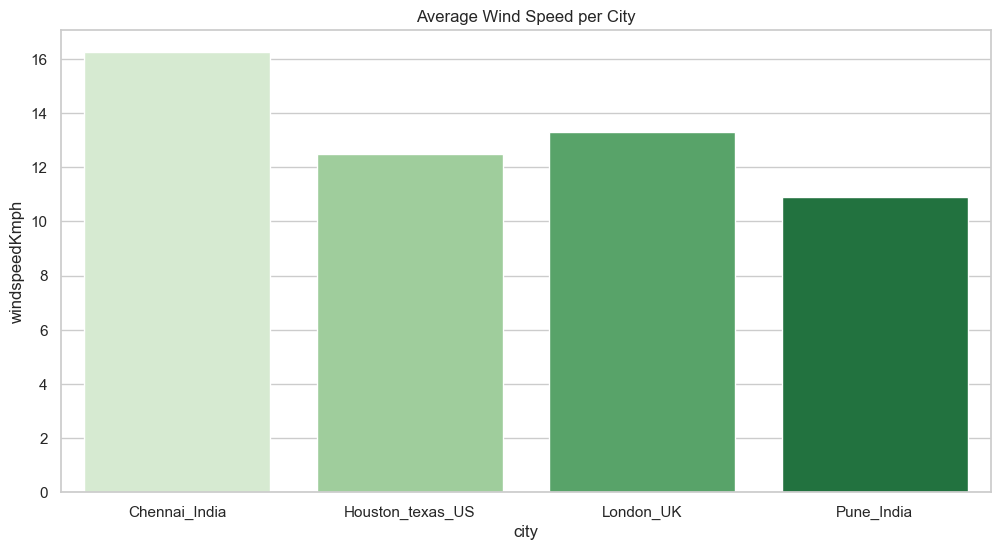

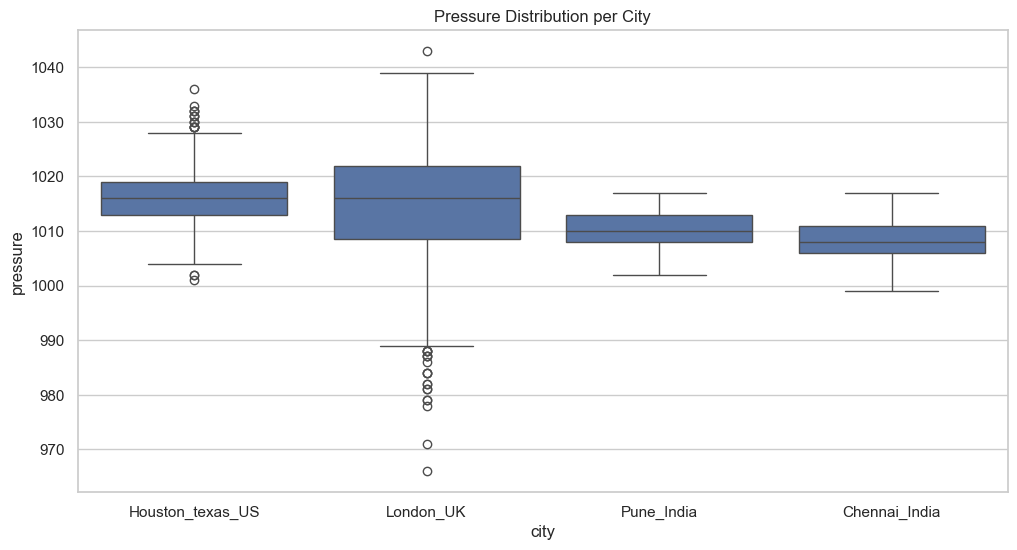

In [7]:

plt.figure()
sns.barplot(data=weather_df.groupby("city")["windspeedKmph"].mean().reset_index(), x="city", y="windspeedKmph", palette="Greens")
plt.title("Average Wind Speed per City")
plt.show()

plt.figure()
sns.boxplot(data=weather_df, x="city", y="pressure")
plt.title("Pressure Distribution per City")
plt.show()


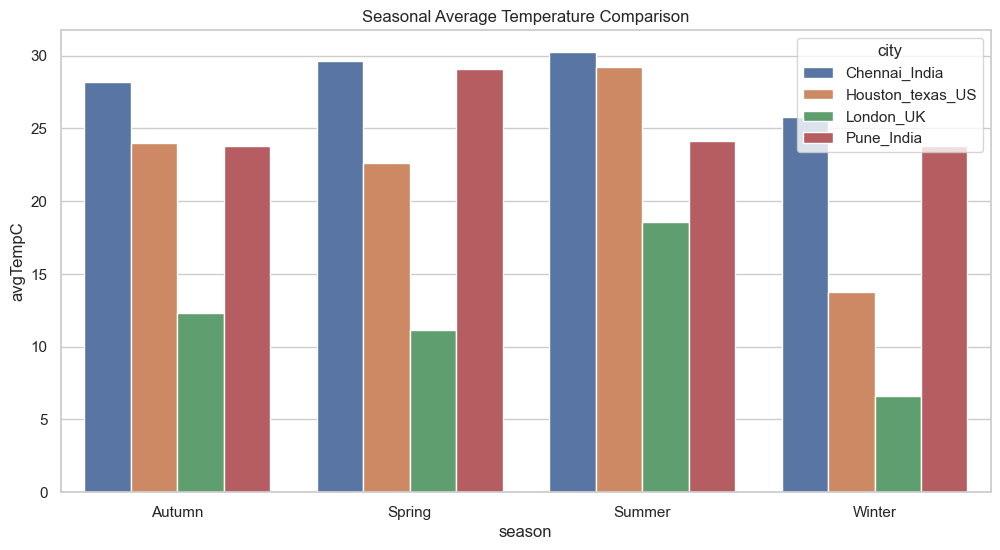

In [8]:
weather_df["month"] = weather_df["date"].dt.month
def get_season(month):
    if month in [12,1,2]: return "Winter"
    elif month in [3,4,5]: return "Spring"
    elif month in [6,7,8]: return "Summer"
    else: return "Autumn"

weather_df["season"] = weather_df["month"].apply(get_season)

seasonal_avg = weather_df.groupby(["city","season"])["avgTempC"].mean().reset_index()
sns.barplot(data=seasonal_avg, x="season", y="avgTempC", hue="city")
plt.title("Seasonal Average Temperature Comparison")
plt.show()


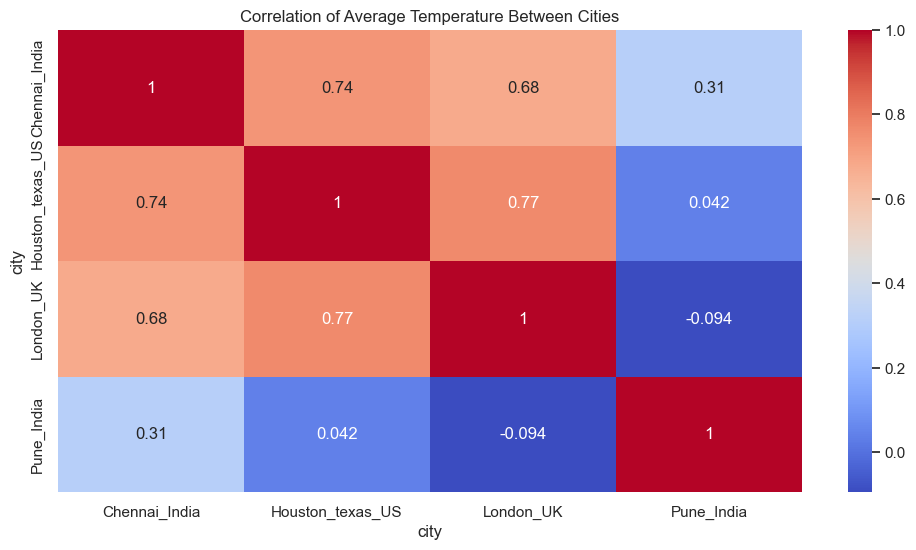

In [9]:

pivot_temp = weather_df.pivot(index="date", columns="city", values="avgTempC")
sns.heatmap(pivot_temp.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Average Temperature Between Cities")
plt.show()



,city,last_date,next_day,predicted_avgTempC
0,Houston_texas_US,2025-10-25,2025-10-26,24.372857
1,London_UK,2025-10-25,2025-10-26,8.708115
2,Pune_India,2025-10-25,2025-10-26,23.444076
3,Chennai_India,2025-10-25,2025-10-26,27.641102


d:\academics\New_folder\projects\bp_assignments\weather_analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


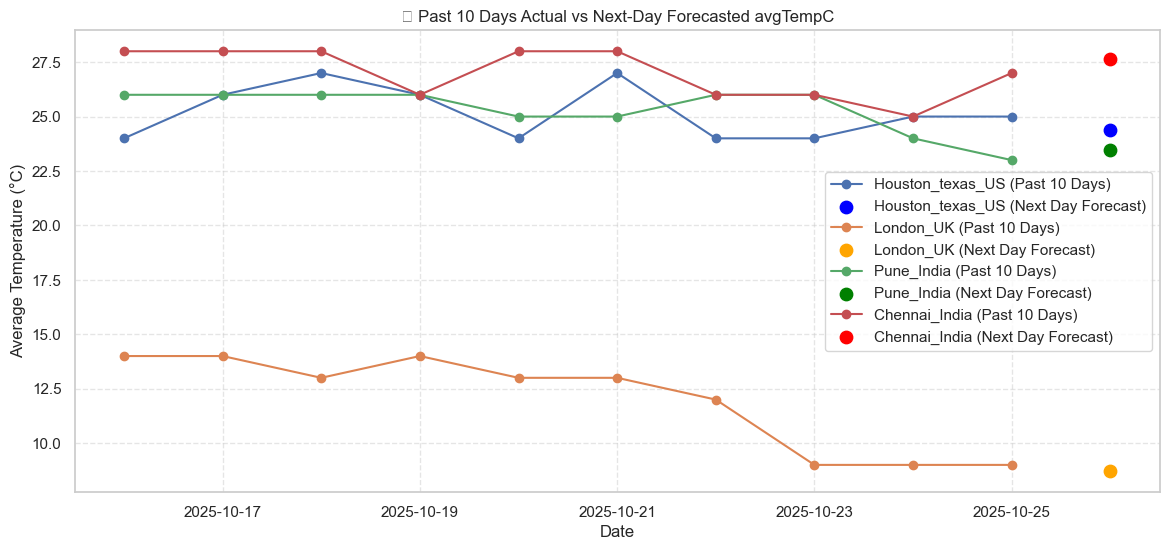

In [17]:
# ================================================
# 🔮 Next-Day Forecast with Past 10-Day Trend
# ================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np

models = {}
next_day_forecast = []
plot_data = []

for city in weather_df["city"].unique():
    city_df = weather_df[weather_df["city"] == city].copy().sort_values("date")

    # ---- Create lag features ----
    city_df["avgTempC_prev1"] = city_df["avgTempC"].shift(1)
    city_df["avgTempC_prev2"] = city_df["avgTempC"].shift(2)
    city_df["avgTempC_prev3"] = city_df["avgTempC"].shift(3)
    city_df.dropna(inplace=True)

    feature_cols = [
        "maxtempC", "mintempC", "humidity", "pressure", "windspeedKmph",
        "precipMM", "sunHour", "uvIndex", "temp_range",
        "avgTempC_prev1", "avgTempC_prev2", "avgTempC_prev3"
    ]
    X = city_df[feature_cols]
    y = city_df["avgTempC"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10)
    model.fit(X_train_scaled, y_train)

    models[city] = (model, scaler, feature_cols)

    # ---- Next-day prediction ----
    last_known = city_df.iloc[-3:].copy()
    last_row = last_known.iloc[-1].copy()

    new_input = pd.DataFrame([{
        "maxtempC": last_row["maxtempC"],
        "mintempC": last_row["mintempC"],
        "humidity": last_row["humidity"],
        "pressure": last_row["pressure"],
        "windspeedKmph": last_row["windspeedKmph"],
        "precipMM": last_row["precipMM"],
        "sunHour": last_row["sunHour"],
        "uvIndex": last_row["uvIndex"],
        "temp_range": last_row["maxtempC"] - last_row["mintempC"],
        "avgTempC_prev1": last_known.iloc[-1]["avgTempC"],
        "avgTempC_prev2": last_known.iloc[-2]["avgTempC"],
        "avgTempC_prev3": last_known.iloc[-3]["avgTempC"],
    }])

    X_scaled = scaler.transform(new_input)
    next_day_pred = model.predict(X_scaled)[0]

    next_day = city_df["date"].iloc[-1] + pd.Timedelta(days=1)
    next_day_forecast.append({
        "city": city,
        "last_date": city_df["date"].iloc[-1],
        "next_day": next_day,
        "predicted_avgTempC": next_day_pred
    })

    # ---- Prepare data for visualization ----
    last_10_days = city_df.tail(10)[["date", "avgTempC"]].copy()
    last_10_days["type"] = "Actual"
    next_row = pd.DataFrame({
        "date": [next_day],
        "avgTempC": [next_day_pred],
        "type": ["Predicted"]
    })
    city_plot_df = pd.concat([last_10_days, next_row])
    city_plot_df["city"] = city
    plot_data.append(city_plot_df)

# ---- Combine forecast data ----
forecast_df = pd.DataFrame(next_day_forecast)
display(forecast_df)

plot_df = pd.concat(plot_data, ignore_index=True)

# ---- Visualization ----
plt.figure(figsize=(14,6))
for city in plot_df["city"].unique():
    city_data = plot_df[plot_df["city"] == city]
    actual = city_data[city_data["type"] == "Actual"]
    predicted = city_data[city_data["type"] == "Predicted"]
    
    plt.plot(actual["date"], actual["avgTempC"], label=f"{city} (Past 10 Days)", marker="o")
    if(city == "Pune_India"):
        plt.scatter(predicted["date"], predicted["avgTempC"], color="green", s=80, label=f"{city} (Next Day Forecast)")
    elif city == "London_UK":
        plt.scatter(predicted["date"], predicted["avgTempC"], color="orange", s=80, label=f"{city} (Next Day Forecast)")
    elif city == "Houston_texas_US":
        plt.scatter(predicted["date"], predicted["avgTempC"], color="blue", s=80, label=f"{city} (Next Day Forecast)")
    else:
        plt.scatter(predicted["date"], predicted["avgTempC"], color="red", s=80, label=f"{city} (Next Day Forecast)")
plt.title("📈 Past 10 Days Actual vs Next-Day Forecasted avgTempC")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [ ]:
weather_df.to_csv(os.path.join(data_dir, "combined_weather_data.csv"), index=False)
print("✅ Combined cleaned data saved.")
